## Data Science : Individueel Labo 1 - Groep Di VM

### Deel 1 - Numpy

#### 1.1 (1 ptn)
Lees de gegeven jpg figuur in als een numpy array. Gebruik hiervoor de functie `imread` uit de module `matplotlib.image`. Plot de figuur uit via de functie `imshow`

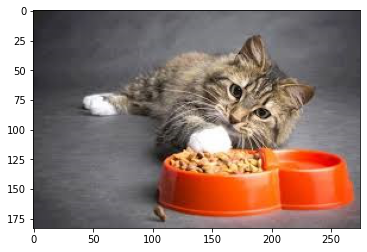

In [24]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt

foto = image.imread('kat.jpg')
fotoArray = np.array(foto)

plt.imshow(fotoArray)
plt.show()


#### 1.2 (2 ptn)
Lees het type en shape van je figuur uit. Leg in je eigen woorden uit (markdown!) waarom een .jpg file deze shape heeft. 

In [25]:
print('\ndim: ', fotoArray.ndim)
print('\nshape: ',fotoArray.shape)
print('\ntype: ', fotoArray.dtype)

print('\nlaaste rij \n',fotoArray[2:,2:,2:]  [2:,2:,2:])

print('\nlaaste rij \n',fotoArray[:,:,-1])


dim:  3

shape:  (183, 275, 3)

type:  uint8

laaste rij 
 []

laaste rij 
 [[34 34 34 ... 66 66 66]
 [34 34 34 ... 66 66 66]
 [34 34 34 ... 66 66 66]
 ...
 [63 63 64 ... 85 85 85]
 [63 63 64 ... 91 91 91]
 [63 63 64 ... 92 92 92]]


RGB(Rood , Groen , Blue) een jpg file heeft deze shape door de 3 basis kleuren op andere kleuren te vormen

#### 1.3 (2 ptn)
Maak een copy van je ingelezen figuur. Pas op deze copy slicing toe om voor elke pixel de waarde van het rood-kanaal op 0 te zetten.
Plot je figuur nu met deze gewijzigde kleur-informatie. Test zelf dat de shape ongewijzigd is en dat je roodwaarden effectief op 0 staan door de gegevens van 1 pixel uit te printen.

(183, 275, 3)
[ 0 39 34]


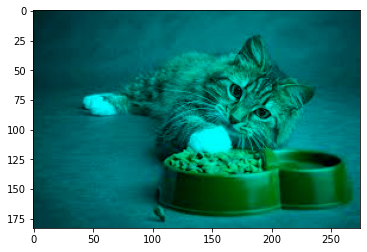

In [26]:
figuur = fotoArray.copy()
figuur[:,:,0] = 0
print(figuur.shape)
print(figuur[1,1,:])

fig, ax = plt.subplots()
heatmap = ax.imshow(figuur)
plt.show()


#### 1.4 (2 ptn)
Maak opnieuw een copy van de oorspronkelijke figuur. Schrijf nu een booleaans masker om deze pixels te selecteren waarvan de rood-waarde > 200. Gebruik dit masker om de kleurwaarden van deze pixels aan te passen naar de waarden $[100,100,100]$. Plot je gewijzigde figuur opnieuw uit.

[[38 38 38 ... 62 62 62]
 [38 38 38 ... 62 62 62]
 [38 38 38 ... 62 62 62]
 ...
 [58 58 59 ... 84 84 84]
 [58 58 59 ... 88 88 88]
 [58 58 59 ... 89 89 89]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


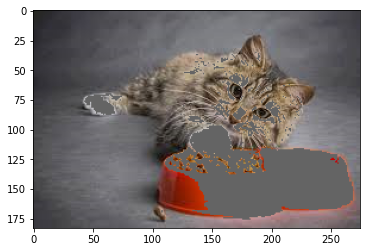

In [27]:
figuur = fotoArray.copy()
print(figuur[:,:,0])
mask1 = figuur[:,:,0] > 200
print(mask1)

figuur[mask1] = [100,100,100]


fig, ax = plt.subplots()
heatmap = ax.imshow(figuur)
plt.show()

#### 1.5 (2ptn)

Verander de shape van je figuur door een gemiddelde te berekenen van alle kleurkanalen. (3 kleurwaarden worden 1). 
Plot de figuur opnieuw uit, hierbij kan je gebruik maken van de colormap 'gray' .

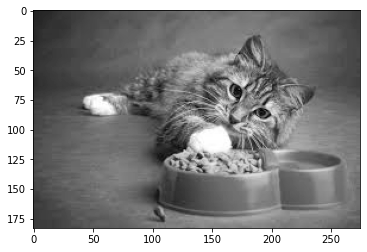

In [28]:
averages = fotoArray.mean(axis = 2) #take the average of R, G en B
fig, ax = plt.subplots()
heatmap = ax.imshow(averages, cmap = 'gray')
plt.show()

### Deel 2 - Pandas

Bijgevoegd vind je 3 csv bestanden met gegevens over crowdfunding projecten. Voer onderstaande operaties hierop uit.

_TIP__ : bij het beantwoorden van queries over de data kan je eenvoudig je antwoord zelf controleren door naar de data te kijken !!!





#### **2.1** (1 ptn)

Lees deze bestanden in naar 3 dataframes en ga welke gegevens ze bevatten door de eerste 15 lijnen ervan uit te lezen. Ga tevens na wat het datatype van elke kolom is en of deze lege velden bevatten.

In [29]:
import pandas as pd
projecten = pd.read_csv('crowdprojecten.csv')
donaties = pd.read_csv('donaties.csv')
donatieTypes = pd.read_csv('donatietypes.csv')

# Eerste 15 lijnen
print(projecten[-15:])
print(donaties[-15:])
print(donatieTypes[-15:])


    projectID  platformID  projecthouderID       start       einde  \
0           1           1                4  2018-03-01  2018-05-01   
1           2           1                5  2017-12-01  2018-02-15   
2           3           1                6  2017-10-01  2018-01-30   
3           4           1                7  2018-04-15  2018-07-15   
4           5           1                8  2017-05-15  2017-08-15   
5           6           2                6  2018-02-15  2018-05-15   
6           7           2                9  2018-02-15  2018-06-01   
7           8           2               10  2018-01-01  2018-03-01   
8           9           2               11  2017-11-15  2018-01-30   
9          10           3               12  2016-12-01  2017-03-01   
10         11           3               12  2018-04-15  2018-07-15   
11         12           3               13  2018-02-15  2018-06-01   
12         13           3                8  2017-05-01  2017-09-15   
13         14       

In [30]:
print(projecten.info())
print(donaties.info())
print(donatieTypes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   projectID        15 non-null     int64 
 1   platformID       15 non-null     int64 
 2   projecthouderID  15 non-null     int64 
 3   start            15 non-null     object
 4   einde            15 non-null     object
 5   doelbedrag       15 non-null     int64 
 6   categorie        15 non-null     object
 7   projecttitel     15 non-null     object
dtypes: int64(4), object(4)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   donateursID        76 non-null     int64 
 1   projectID          76 non-null     int64 
 2   tijdstip           76 non-null     object
 3   mededeling         16 non-null     object
 4   geko

#### **2.2** (2 ptn)
Combineer deze 3 dataframes tot 1 grote dataframe. Combineer data alleen waar mogelijk (creëer dus geen extra NaN-waarden en de csv files moeten ongewijzigd blijven)

In [31]:
merge1 = pd.merge(projecten,donaties, on= 'projectID')
print(merge1)
print(donatieTypes)

    projectID  platformID  projecthouderID       start       einde  \
0           1           1                4  2018-03-01  2018-05-01   
1           1           1                4  2018-03-01  2018-05-01   
2           1           1                4  2018-03-01  2018-05-01   
3           1           1                4  2018-03-01  2018-05-01   
4           1           1                4  2018-03-01  2018-05-01   
..        ...         ...              ...         ...         ...   
71         15           3               15  2017-06-01  2017-10-15   
72         15           3               15  2017-06-01  2017-10-15   
73         15           3               15  2017-06-01  2017-10-15   
74         15           3               15  2017-06-01  2017-10-15   
75         15           3               15  2017-06-01  2017-10-15   

    doelbedrag    categorie                projecttitel  donateursID  \
0        25000       Design  Van plastic tot iets moois           17   
1        25000 

In [32]:
#merge1.rename(colums)
donatieTypes
x = donatieTypes['donatieID'] 
donatieTypes
donatieTypes['gekozen_donatieID']  = x
donatieTypes
del donatieTypes['donatieID']
donatieTypes
merge2 = pd.merge(merge1,donatieTypes, on = 'gekozen_donatieID')
print(merge2)

    projectID  platformID  projecthouderID       start       einde  \
0           1           1                4  2018-03-01  2018-05-01   
1           1           1                4  2018-03-01  2018-05-01   
2           4           1                7  2018-04-15  2018-07-15   
3           7           2                9  2018-02-15  2018-06-01   
4          10           3               12  2016-12-01  2017-03-01   
..        ...         ...              ...         ...         ...   
71         12           3               13  2018-02-15  2018-06-01   
72         12           3               13  2018-02-15  2018-06-01   
73         12           3               13  2018-02-15  2018-06-01   
74         15           3               15  2017-06-01  2017-10-15   
75         15           3               15  2017-06-01  2017-10-15   

    doelbedrag    categorie                projecttitel  donateursID  \
0        25000       Design  Van plastic tot iets moois           17   
1        25000 

#### **2.3** (2 ptn)
Sorteer vervolgens de gegevens op 1) de startdatum van het project, en 2) het tijdstip van de donatie. Sorteer de recentste data bovenaan. Maak deze wijziging blijvend en repareer de index-wijzigingen die hierdoor ontstaan.


In [33]:
merge2.sort_values(by=['start','tijdstip'], ascending=[False,False])

,projectID,platformID,projecthouderID,start,einde,doelbedrag,categorie,projecttitel,donateursID,tijdstip,mededeling,gekozen_donatieID,bedrag,voordeel
10,14,3,14,2018-05-01,2018-09-01,15000,Voeding,Kippenkraam,36,2018-05-12 00:00:00,lekkere kippen,10,1000,gratis testdeelname
12,14,3,14,2018-05-01,2018-09-01,15000,Voeding,Kippenkraam,12,2018-05-02 00:00:00,NaN,12,5000,deelname startevent voor 10 personen
68,11,3,12,2018-04-15,2018-07-15,12000,Energie,nog slimmere meters,17,2018-06-03 00:00:00,NaN,14,50000,aandelen
6,11,3,12,2018-04-15,2018-07-15,12000,Energie,nog slimmere meters,24,2018-06-02 00:00:00,NaN,10,1000,gratis testdeelname
69,11,3,12,2018-04-15,2018-07-15,12000,Energie,nog slimmere meters,35,2018-05-16 00:00:00,NaN,14,50000,aandelen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,3,12,2016-12-01,2017-03-01,100000,Energie,slimme meters,35,2017-03-01 00:00:00,NaN,14,50000,aandelen
4,10,3,12,2016-12-01,2017-03-01,100000,Energie,slimme meters,24,2017-02-14 00:00:00,NaN,10,1000,gratis testdeelname
22,10,3,12,2016-12-01,2017-03-01,100000,Energie,slimme meters,31,2016-02-25 00:00:00,NaN,13,10000,winstdeelname
5,10,3,12,2016-12-01,2017-03-01,100000,Energie,slimme meters,27,2016-02-19 00:00:00,NaN,10,1000,gratis testdeelname


#### **2.4** (2 ptn)
Projecten behoren tot een bepaalde categorie. Tel het aantal projecten per categorie, toon het resultaat in een serie waarbij de categorienamen de index vormen en de aantallen de waarden van de serie. Visualiseer deze gegevens in een bar plot waarin elke categorie een andere kleur krijgt. Geef je plot een titel en toon x en y labels op je assen.


In [39]:
import matplotlib.pyplot as plt
SerieCategorie  = projecten['categorie'].value_counts()
print(SerieCategorie)


Technologie    4
Overig         3
Design         2
Energie        2
Voeding        2
Gezondheid     1
Mode           1
Name: categorie, dtype: int64


<AxesSubplot:>

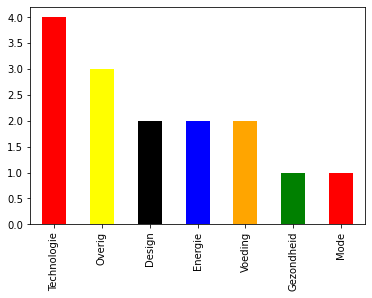

In [42]:


c =  ['red', 'yellow', 'black', 'blue', 'orange', 'green']
SerieCategorie.plot.bar(color = c)

#### **2.5** (4 ptn)

Geef een antwoord op volgende vragen :

- Bij hoeveel donaties werd een mededeling ingegeven? 
- Geef een overzicht van alle projecten die geslaagd zijn. Toon per project : de projectID, de ID van de projecthouder, de categorie van het project, de start en eind datum, het doelbedrag en het totale bedrag dat opgehaald werd. Ga tevens na hoeveel extra geld elk geslaagd project binnen gehaald heeft en neem deze extra kolom mee op in je overzicht. Sorteer je overzicht volgens dit extra bedrag.



In [ ]:
test = merge2[(merge2['mededeling'].notna())]
test

,projectID,platformID,projecthouderID,start,einde,doelbedrag,categorie,projecttitel,donateursID,tijdstip,mededeling,gekozen_donatieID,bedrag,voordeel
8,13,3,8,2017-05-01,2017-09-15,5000,Voeding,mobiele keukens,25,2017-06-14 00:00:00,goed zo!,10,1000,gratis testdeelname
10,14,3,14,2018-05-01,2018-09-01,15000,Voeding,Kippenkraam,36,2018-05-12 00:00:00,lekkere kippen,10,1000,gratis testdeelname
11,1,1,4,2018-03-01,2018-05-01,25000,Design,Van plastic tot iets moois,18,2018-05-01 00:00:00,Proficiat aan de projecthouder,12,5000,deelname startevent voor 10 personen
13,1,1,4,2018-03-01,2018-05-01,25000,Design,Van plastic tot iets moois,20,2018-03-10 00:00:00,Goed initiatief!,7,500,klein reclamepaneel
14,3,1,6,2017-10-01,2018-01-30,1500,Gezondheid,een groene oase in de stad,14,2017-10-05 00:00:00,succes!,7,500,klein reclamepaneel
16,7,2,9,2018-02-15,2018-06-01,3000,Overig,een openlucht museum,22,2018-02-22 00:00:00,ik kijk er naar uit!,7,500,klein reclamepaneel
21,1,1,4,2018-03-01,2018-05-01,25000,Design,Van plastic tot iets moois,22,2018-04-02 00:00:00,hopelijk lukt het!,13,10000,winstdeelname
28,1,1,4,2018-03-01,2018-05-01,25000,Design,Van plastic tot iets moois,25,2018-04-12 00:00:00,Veel succes,9,1000,korting bij aankoop product
30,4,1,7,2018-04-15,2018-07-15,18000,Design,designzetels,38,2018-04-20 00:00:00,graag een zetel voor mij!,9,1000,korting bij aankoop product
37,3,1,6,2017-10-01,2018-01-30,1500,Gezondheid,een groene oase in de stad,29,2017-12-31 00:00:00,gelukkig nieuwjaar,5,100,bedanking in folder


- Geef een overzicht van alle projecten die geslaagd zijn. Toon per project : de projectID, de ID van de projecthouder, de categorie van het project, de start en eind datum, het doelbedrag en het totale bedrag dat opgehaald werd. Ga tevens na hoeveel extra geld elk geslaagd project binnen gehaald heeft en neem deze extra kolom mee op in je overzicht. Sorteer je overzicht volgens dit extra bedrag.

In [ ]:

geslaagd = merge2[(merge2['doelbedrag'] == merge2['bedrag'])]
print(geslaagd)

Empty DataFrame
Columns: [projectID, platformID, projecthouderID, start, einde, doelbedrag, categorie, projecttitel, donateursID, tijdstip, mededeling, gekozen_donatieID, bedrag, voordeel]
Index: []
